# Test 6 nimmt env (by hand)

In [1]:
import numpy as np
import logging
import sys
from tqdm import tqdm
from matplotlib import pyplot as plt

sys.path.append("../")

from rl_6_nimmt import SechsNimmtEnv, GameSession
from rl_6_nimmt.agents import Human, DrunkHamster, MaskedReinforceAgent

logging.basicConfig(format="%(message)s",level=logging.INFO)
for name in logging.root.manager.loggerDict:
    if not "rl_6_nimmt" in name:
        logging.getLogger(name).setLevel(logging.WARNING)


## Setting up the environment and the agents

In [2]:
env = SechsNimmtEnv(num_players=3)

reinforce = MaskedReinforceAgent(env)
reinforce.train()

hamster1 = DrunkHamster(env)
hamster2 = DrunkHamster(env)

johann = Human(env, name="Johann")


## Let the computer warm up a little bit by playing a few games on their own

In [3]:
session = GameSession(env, reinforce, hamster1, hamster2)

num_episodes = 1000
for _ in tqdm(range(num_episodes)):
    session.play_game(render=False)


100%|██████████| 1000/1000 [00:08<00:00, 118.83it/s]


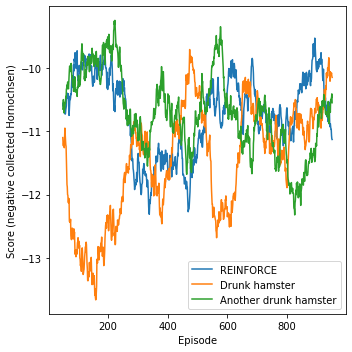

In [4]:
results = np.array(session.results)

def plot_running_mean(x, n=100, **kwargs):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    running_mean = (cumsum[n:] - cumsum[:-n]) / n
    plt.plot(np.arange(n / 2.0, len(x) + 1 - n / 2.0), running_mean, **kwargs)
    
    
plt.figure(figsize=(5,5))

plot_running_mean(results[:,0], label="REINFORCE")
plot_running_mean(results[:,1], label="Drunk hamster")
plot_running_mean(results[:,2], label="Another drunk hamster")

plt.legend()

plt.xlabel("Episode")
plt.ylabel("Score (negative collected Hornochsen)")

plt.tight_layout()
plt.show()


## Let's play a game

In [5]:
session = GameSession(env, johann, reinforce, hamster1)

for name in logging.root.manager.loggerDict:
    if "rl_6_nimmt" in name:
        logging.getLogger(name).setLevel(logging.DEBUG)
        

In [6]:
session.play_game(render=True)

Dealing cards
--------------------------------------------------------------------------------
Board:
   55   _   _   _   _   *
   49   _   _   _   _   *
   94   _   _   _   _   *
    9   _   _   _   _   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  13  21  22  23  37  59  60  64  97 100
  MaskedReinforceAgent (player 2):   0 Hornochsen, cards   3   6  15  26  32  68  76  81  92  95
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  40  45  46  48  50  79  86  90 101
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  13  21  22  23  37  59  60  64  97 100. Choose one to play! 13


MaskedReinforceAgent (player 2) plays card 6
  ...chooses to replace row 1
  ...and gains 7 Hornochsen
Johann               (player 1) plays card 13
DrunkHamster         (player 3) plays card 90
--------------------------------------------------------------------------------
Board:
    6   _   _   _   _   *
   49  90   _   _   _   *
   94   _   _   _   _   *
    9  13   _   _   _   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  21  22  23  37  59  60  64  97 100
  MaskedReinforceAgent (player 2):   7 Hornochsen, cards   3  15  26  32  68  76  81  92  95
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  40  45  46  48  50  79  86 101
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  21  22  23  37  59  60  64  97 100. Choose one to play! 21


Johann               (player 1) plays card 21
MaskedReinforceAgent (player 2) plays card 32
DrunkHamster         (player 3) plays card 46
--------------------------------------------------------------------------------
Board:
    6   _   _   _   _   *
   49  90   _   _   _   *
   94   _   _   _   _   *
    9  13  21  32  46   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  22  23  37  59  60  64  97 100
  MaskedReinforceAgent (player 2):   7 Hornochsen, cards   3  15  26  68  76  81  92  95
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  40  45  48  50  79  86 101
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  22  23  37  59  60  64  97 100. Choose one to play! 22


Johann               (player 1) plays card 22
MaskedReinforceAgent (player 2) plays card 68
  ...and gains 5 Hornochsen
DrunkHamster         (player 3) plays card 101
--------------------------------------------------------------------------------
Board:
    6  22   _   _   _   *
   49  90   _   _   _   *
   94 101   _   _   _   *
   68   _   _   _   _   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  23  37  59  60  64  97 100
  MaskedReinforceAgent (player 2):  12 Hornochsen, cards   3  15  26  76  81  92  95
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  40  45  48  50  79  86
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  23  37  59  60  64  97 100. Choose one to play! 23


Johann               (player 1) plays card 23
DrunkHamster         (player 3) plays card 40
MaskedReinforceAgent (player 2) plays card 76
--------------------------------------------------------------------------------
Board:
    6  22  23  40   _   *
   49  90   _   _   _   *
   94 101   _   _   _   *
   68  76   _   _   _   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  37  59  60  64  97 100
  MaskedReinforceAgent (player 2):  12 Hornochsen, cards   3  15  26  81  92  95
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  45  48  50  79  86
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  37  59  60  64  97 100. Choose one to play! 97


DrunkHamster         (player 3) plays card 86
MaskedReinforceAgent (player 2) plays card 92
Johann               (player 1) plays card 97
--------------------------------------------------------------------------------
Board:
    6  22  23  40   _   *
   49  90  92  97   _   *
   94 101   _   _   _   *
   68  76  86   _   _   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  37  59  60  64 100
  MaskedReinforceAgent (player 2):  12 Hornochsen, cards   3  15  26  81  95
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  45  48  50  79
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  37  59  60  64 100. Choose one to play! 100


DrunkHamster         (player 3) plays card 45
MaskedReinforceAgent (player 2) plays card 95
Johann               (player 1) plays card 100
--------------------------------------------------------------------------------
Board:
    6  22  23  40  45   *
   49  90  92  97 100   *
   94 101   _   _   _   *
   68  76  86  95   _   *
Players:
  Johann               (player 1):   0 Hornochsen, cards  37  59  60  64
  MaskedReinforceAgent (player 2):  12 Hornochsen, cards   3  15  26  81
  DrunkHamster         (player 3):   0 Hornochsen, cards  30  48  50  79
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  37  59  60  64. Choose one to play! 37


Johann               (player 1) plays card 37
  ...chooses to replace row 3
  ...and gains 2 Hornochsen
DrunkHamster         (player 3) plays card 48
  ...and gains 12 Hornochsen
MaskedReinforceAgent (player 2) plays card 81
--------------------------------------------------------------------------------
Board:
   48  81   _   _   _   *
   49  90  92  97 100   *
   37   _   _   _   _   *
   68  76  86  95   _   *
Players:
  Johann               (player 1):   2 Hornochsen, cards  59  60  64
  MaskedReinforceAgent (player 2):  12 Hornochsen, cards   3  15  26
  DrunkHamster         (player 3):  12 Hornochsen, cards  30  50  79
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  59  60  64. Choose one to play! 59


MaskedReinforceAgent (player 2) plays card 26
  ...chooses to replace row 3
  ...and gains 1 Hornochsen
Johann               (player 1) plays card 59
DrunkHamster         (player 3) plays card 79
--------------------------------------------------------------------------------
Board:
   48  81   _   _   _   *
   49  90  92  97 100   *
   26  59  79   _   _   *
   68  76  86  95   _   *
Players:
  Johann               (player 1):   2 Hornochsen, cards  60  64
  MaskedReinforceAgent (player 2):  13 Hornochsen, cards   3  15
  DrunkHamster         (player 3):  12 Hornochsen, cards  30  50
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  60  64. Choose one to play! 60


MaskedReinforceAgent (player 2) plays card 3
  ...chooses to replace row 1
  ...and gains 2 Hornochsen
DrunkHamster         (player 3) plays card 30
Johann               (player 1) plays card 60
--------------------------------------------------------------------------------
Board:
    3  30  60   _   _   *
   49  90  92  97 100   *
   26  59  79   _   _   *
   68  76  86  95   _   *
Players:
  Johann               (player 1):   2 Hornochsen, cards  64
  MaskedReinforceAgent (player 2):  15 Hornochsen, cards  15
  DrunkHamster         (player 3):  12 Hornochsen, cards  50
--------------------------------------------------------------------------------


It is your turn, Johann! 
 You have the following cards:  64. Choose one to play! 64


MaskedReinforceAgent (player 2) plays card 15
  ...chooses to replace row 3
  ...and gains 3 Hornochsen
DrunkHamster         (player 3) plays card 50
Johann               (player 1) plays card 64
--------------------------------------------------------------------------------
Board:
    3  30  60  64   _   *
   49  90  92  97 100   *
   15  50   _   _   _   *
   68  76  86  95   _   *
Players:
  Johann               (player 1):   2 Hornochsen, no cards 
  MaskedReinforceAgent (player 2):  18 Hornochsen, no cards 
  DrunkHamster         (player 3):  12 Hornochsen, no cards 
The game is over! Johann               (player 1) wins, MaskedReinforceAgent (player 2) loses. Congratulations!
--------------------------------------------------------------------------------
